# <font color=purple> EDA-Hotel booking cancellation prediction</font>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_booking=pd.read_csv("hotel_bookings.csv")
hotel_booking.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
44569,City Hotel,0,35,2015,October,41,8,0,2,1,...,No Deposit,9.0,NaN,0,Contract,94.05,0,1,Check-Out,2015-10-10
102770,City Hotel,0,13,2016,December,50,5,1,0,1,...,No Deposit,9.0,NaN,0,Transient,96.00,0,0,Check-Out,2016-12-06
14959,Resort Hotel,1,150,2015,July,28,10,2,2,2,...,No Deposit,240.0,NaN,0,Transient,123.00,0,1,Canceled,2015-04-20
73996,City Hotel,1,293,2015,August,32,6,0,2,2,...,Non Refund,1.0,NaN,0,Contract,62.00,0,0,Canceled,2015-01-01
101483,City Hotel,0,76,2016,November,46,10,0,3,2,...,No Deposit,9.0,NaN,0,Transient,120.90,0,2,Check-Out,2016-11-13
87777,City Hotel,0,44,2016,April,17,23,2,1,1,...,No Deposit,24.0,NaN,0,Transient-Party,85.00,0,0,Check-Out,2016-04-26
27316,Resort Hotel,0,204,2016,August,33,12,4,10,2,...,No Deposit,2.0,NaN,0,Contract,90.10,0,1,Check-Out,2016-08-26
33565,Resort Hotel,0,43,2017,February,8,23,1,3,2,...,No Deposit,240.0,NaN,0,Transient,58.00,0,2,Check-Out,2017-02-27
28523,Resort Hotel,0,152,2016,September,40,26,3,7,2,...,No Deposit,15.0,NaN,0,Transient-Party,82.00,0,1,Check-Out,2016-10-06
6564,Resort Hotel,1,67,2016,June,25,18,0,1,2,...,No Deposit,240.0,NaN,0,Transient,141.00,0,0,Canceled,2016-04-15


There are two types of hotels,in which approximately less number was booked for resort hotel and the rest of was booked for City Hotel.

Below graph represents the difference between canceled and not canceled situation and in which hotel
1=canceled 0= not canceled

Cancellation split between type of hotels

Text(0.5, 1.0, 'number of cancellations')

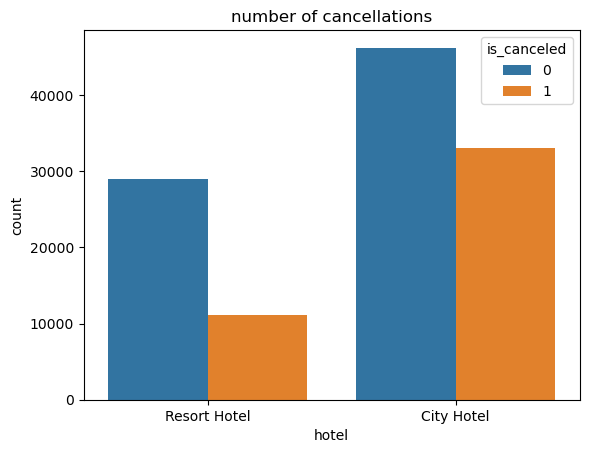

In [3]:
sns.countplot(data=hotel_booking, x='hotel', hue='is_canceled')
plt.title("number of cancellations")


By graphical representation there are two types of hotel resort and city,among which canceling rate is more in city hotel when compared to resort hotel

# Comparative view of type of hotel booked over the years and cancellation status

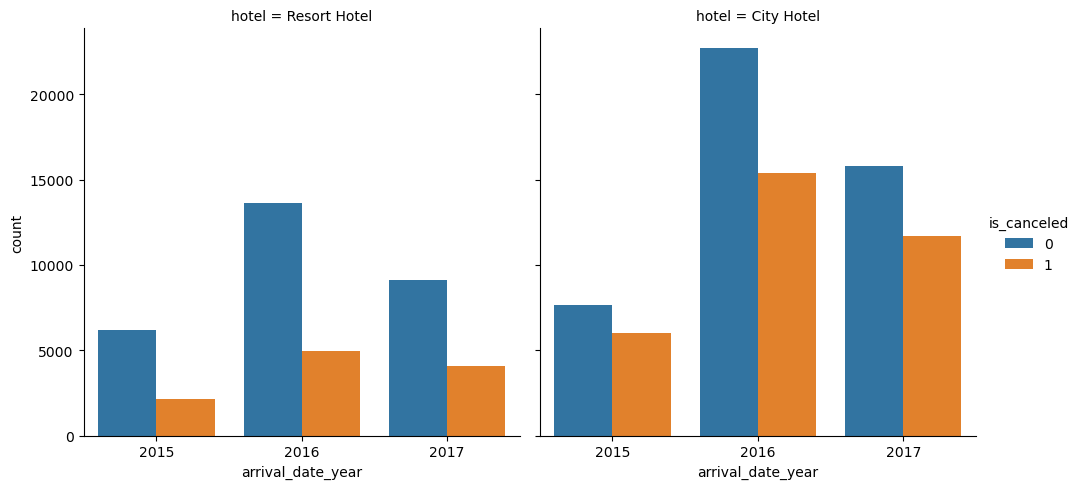

In [4]:
sns.catplot(x ="arrival_date_year", hue="is_canceled", col="hotel", data = hotel_booking, kind="count")
plt.show()

The booking and cancelling rate is high in city hotel in the year of 2016

# For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

<AxesSubplot:>

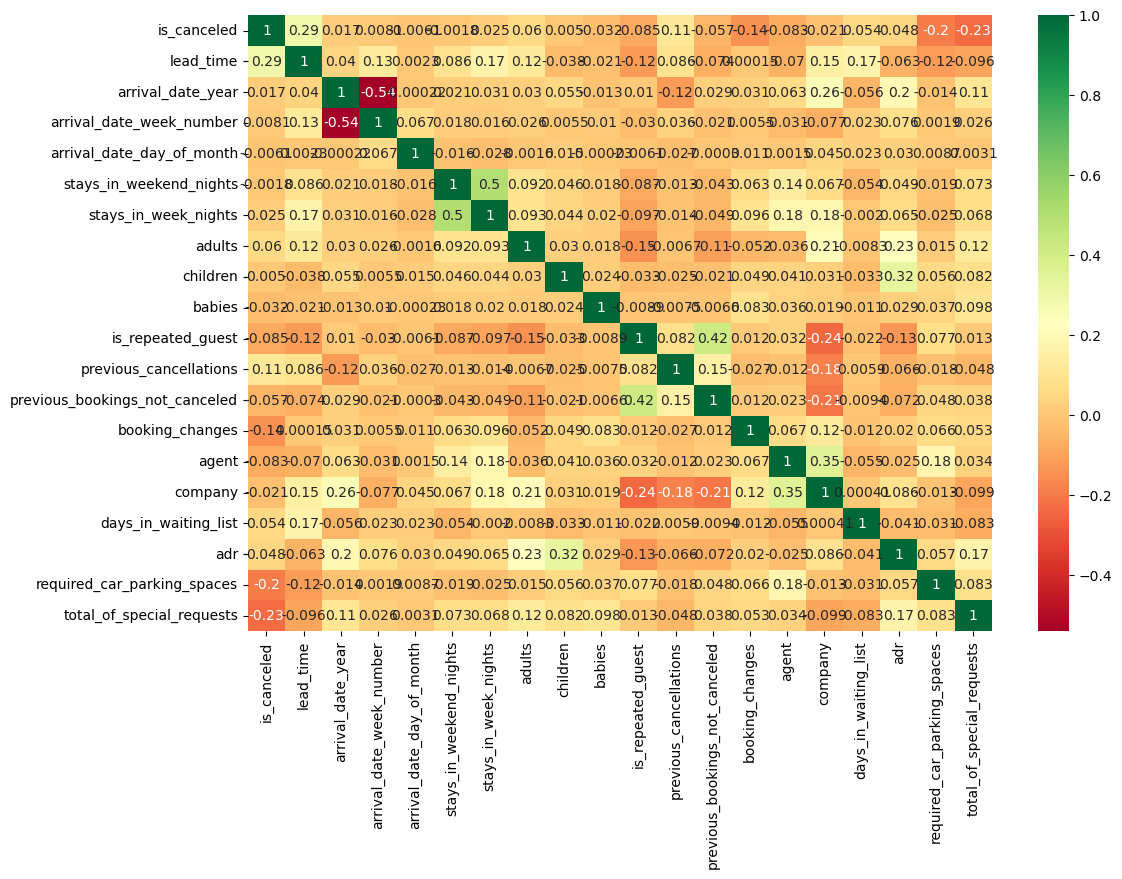

In [5]:
#Lets see the correlation
plt.figure(figsize=(12,8))
sns.heatmap(hotel_booking.corr(),annot=True,cmap='RdYlGn')

# Cancellation

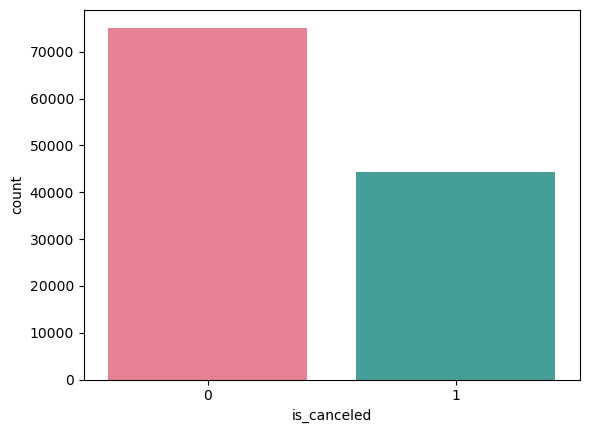

In [8]:
#Canceled=1, Not canceled= 0
canceled_data = hotel_booking['is_canceled']
sns.countplot(canceled_data, palette='husl')

plt.show()

# Majority of bookings were not canceled, still some half of the bookings were canceled

<AxesSubplot:ylabel='is_canceled'>

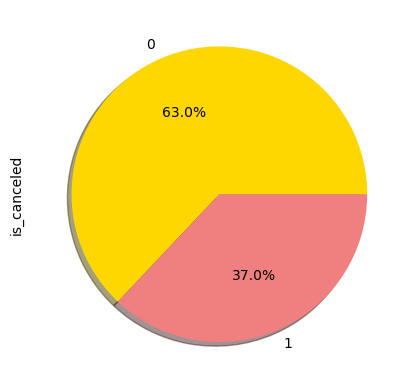

In [9]:
cols = ['gold', 'lightcoral']
hotel_booking['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.

# Number of booking is high in the month of august in city hotel and also the canceling rate is also high

Text(0, 0.5, 'Number of bookings')

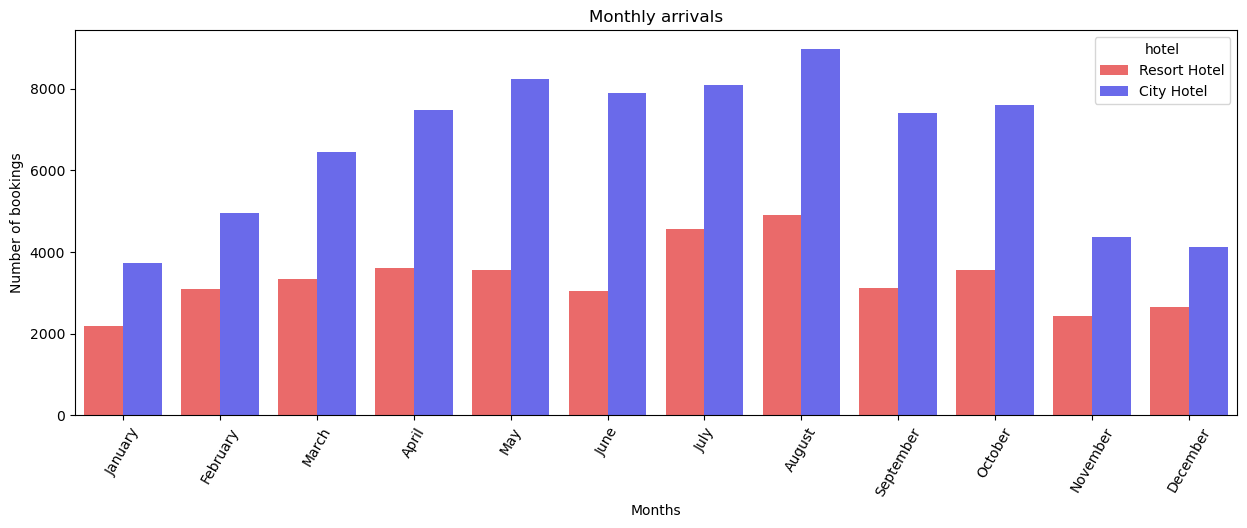

In [13]:
fig = plt.figure(figsize = (15,5))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

sns.countplot(data = hotel_booking,x = 'arrival_date_month',hue = 'hotel',palette ="seismic_r",order=months)
plt.title('monthly arrivals actross the months and hotel type ', fontsize=14)
plt.xticks(rotation = 60)
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

# Cancellation among New guests Vs old Guests

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


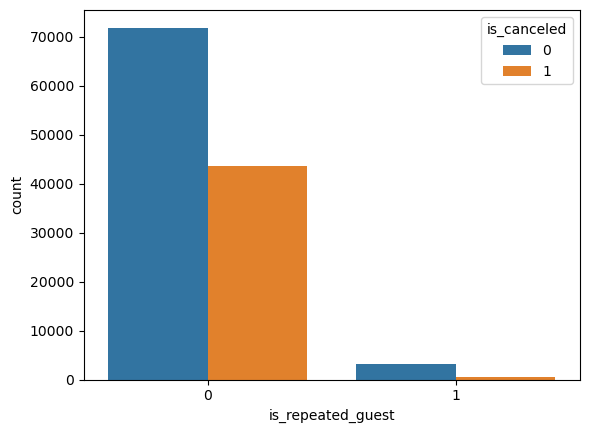

In [14]:
sns.countplot(data=hotel_booking, x='is_repeated_guest', hue='is_canceled')
new_guest = hotel_booking[(hotel_booking['is_repeated_guest']==0) & (hotel_booking['is_canceled']==1)]
old_guest = hotel_booking[(hotel_booking['is_repeated_guest']==1) & (hotel_booking['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(hotel_booking[hotel_booking['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(hotel_booking[hotel_booking['is_repeated_guest']==1])))

The above graph bolsters the evidence that maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking.